# Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Help Functions

In [36]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

In [37]:
def plot_with_zoom(time_indexes, curve, frequency_example = None):
    # Create two subplots, side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the full sine wave on the left subplot
    if frequency_example is not None:
        ax1.set_title(f'A {frequency_example} hertz sine wave')
    else:
        ax1.set_title(f'A sine wave')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Amplitude')
    ax1.plot(time_indexes, curve)

    # Plot the zoomed-in version on the right subplot
    x_axis_max_lim_example = 0.5
    ax2.set_title(f'Zoomed-in Sine Wave (0 to {x_axis_max_lim_example} seconds)')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Amplitude')
    ax2.plot(time_indexes, curve)

    # Set the limits of the x-axis for the right subplot to zoom in
    ax2.set_xlim(0, x_axis_max_lim_example)

    # Show the plot
    plt.tight_layout()  # To prevent overlapping of titles and labels
    plt.show()


# Fourier Domain

In [38]:
# Generate one sine wave
sample_rate_for_example = 44100  # Sample rate in samples per second
duration_for_example = 5   # Duration of the sine wave in seconds

# Generate a frequency_example hertz sine wave that lasts for 5 seconds
frequency_example = 20
time_indexes, sine_20 = generate_sine_wave(frequency_example, sample_rate_for_example, duration_for_example)  # 440 Hertz is A (Lá)


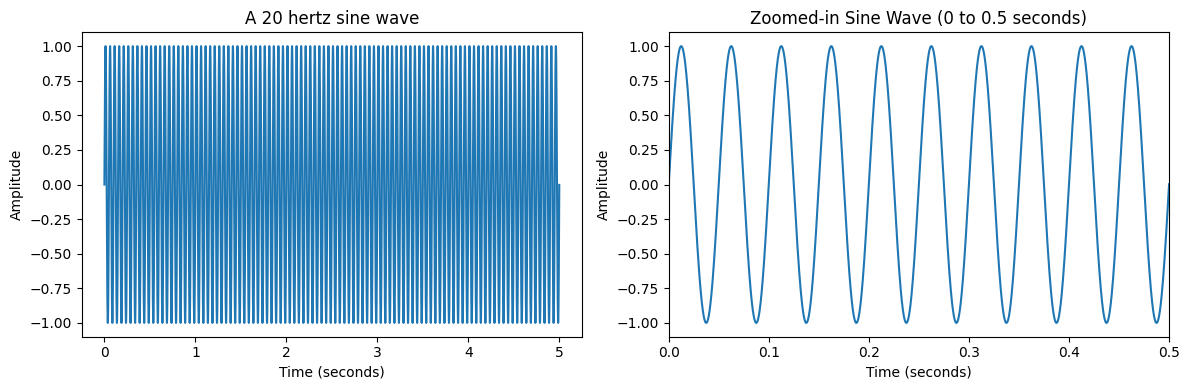

In [39]:
plot_with_zoom(time_indexes, sine_20,frequency_example)

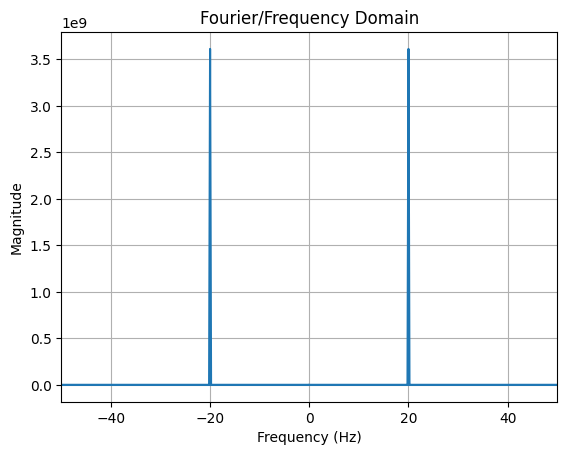

In [40]:
from src.utils import normalize_samples, get_fft_transform, plot_audio_in_frequency
normalized_audio = normalize_samples(sine_20)
yf_toy, xf_toy = get_fft_transform(normalized_audio, sample_rate_for_example, duration_for_example)
plot_audio_in_frequency(xf_toy, yf_toy,[-50,50])

# Notch Filter 
_Filtro Rejeita Faixa (ou Banda)_

## More Waves!

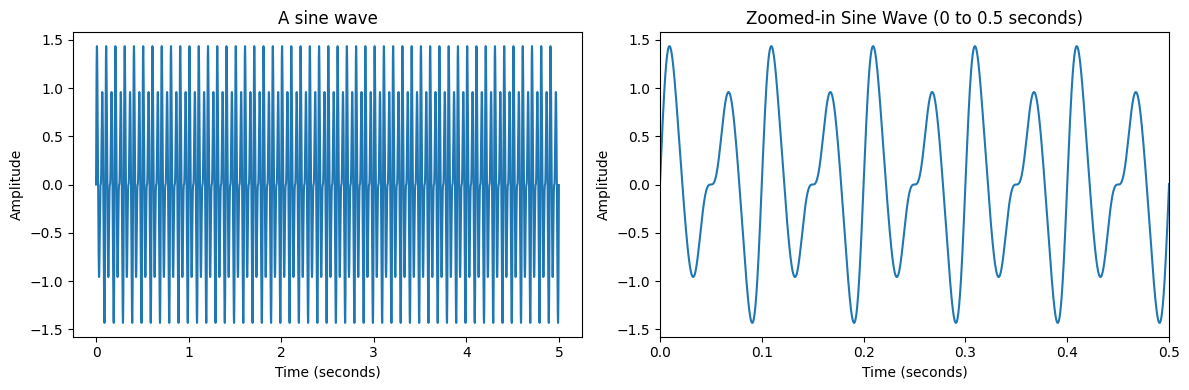

In [41]:
# Generate a frequency_example hertz sine wave that lasts for 5 seconds
_, sine_30 = generate_sine_wave(30, sample_rate_for_example, duration_for_example)  # 440 Hertz is A (Lá)
_, sine_50 = generate_sine_wave(50, sample_rate_for_example, duration_for_example)  

composite_sine = sine_20 + 0.5*sine_30 + 0.1*sine_50
plot_with_zoom(time_indexes, composite_sine)

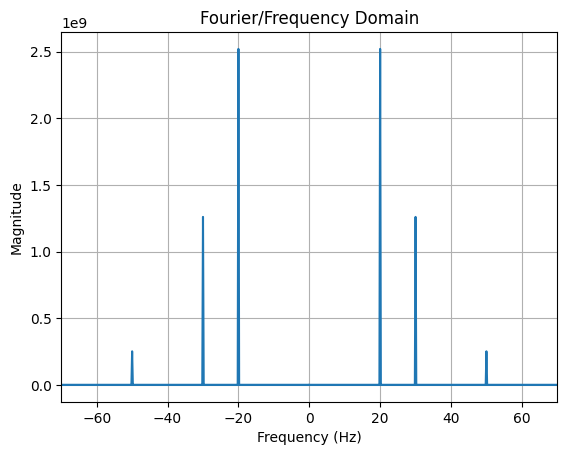

In [42]:
normalized_composite = normalize_samples(composite_sine)
yf_composite, xf_composite = get_fft_transform(normalized_composite, sample_rate_for_example, duration_for_example)
plot_audio_in_frequency(xf_composite, yf_composite,[-70,70])

## Filtering out...

In [43]:
from scipy import signal

fs = sample_rate_for_example  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor

# Design notch filter
b, a = signal.iirnotch(f0, Q, fs)

# Frequency response
freq, h = signal.freqz(b, a, fs=fs)
signal.fftconvolve()